In [120]:
%reload_ext autoreload
%autoreload 2

In [121]:
import autorootcwd
import os
import json
import pandas as pd

In [122]:
DIR = 'results/pitch_shifts'
experiments = os.listdir(DIR)

rows = []
errored = []

for experiment in experiments:
    # Format of filename is {audio}/{cqt}_shift_{prob}_{weighted}
    # e.g. 'cqt_shift_0.5_weighted' or 'audio_shift_0.5'

    # Split the filename to get the shift type and parameters
    parts = experiment.split('_')
    shift_type = parts[0]  # 'cqt' or 'audio'
    shift_params = parts[1:]  # ['shift', '0.5', 'weighted']
    # Extract the shift probability and weighted flag
    shift_prob = float(shift_params[1]) if len(shift_params) > 1 else float(shift_params[0])

    try:
        with open(f'{DIR}/{experiment}/val_metrics.json') as f:
            data = json.load(f)
        rows.append({
            'shift_type': shift_type,
            'aug_shift_prob': shift_prob,
            'weighted': 'weighted' in shift_params,
            'accuracy': data['mean']['song_wise_acc'],
            'root': data['mean']['root'],
            'majmin': data['mean']['majmin'],
            'third': data['mean']['third'],
            'seventh': data['mean']['seventh'],
            'mirex': data['mean']['mirex'],
            'class_wise_acc_mean': data['class_wise_acc_mean'],
            'class_wise_acc_median': data['class_wise_acc_median'],
        })
    except:
        errored.append(experiment)

df = pd.DataFrame(rows)

In [123]:
df.sort_values(by=['shift_type', 'aug_shift_prob'], inplace=True)
df

,shift_type,aug_shift_prob,weighted,accuracy,root,majmin,third,seventh,mirex,class_wise_acc_mean,class_wise_acc_median
15,audio,0.0,False,0.582564,0.774221,0.740732,0.733824,0.604511,0.803671,0.173834,0.000000
21,audio,0.0,True,0.573726,0.787219,0.756622,0.756196,0.592493,0.778120,0.259413,0.158879
12,audio,0.1,False,0.576384,0.767613,0.731512,0.724750,0.598040,0.815045,0.174214,0.000000
22,audio,0.1,True,0.573519,0.788507,0.755615,0.756251,0.591443,0.774731,0.278753,0.252083
32,audio,0.2,False,0.588438,0.778871,0.744609,0.737724,0.610740,0.809142,0.176448,0.000000
36,audio,0.2,True,0.588706,0.793889,0.761544,0.761057,0.607326,0.785015,0.288871,0.284238
33,audio,0.3,False,0.585825,0.779522,0.746465,0.739652,0.608004,0.813394,0.169957,0.000000
35,audio,0.3,True,0.588921,0.797417,0.758750,0.760132,0.605929,0.783544,0.292772,0.288000
29,audio,0.4,True,0.596088,0.797729,0.761603,0.762471,0.613828,0.786909,0.297762,0.302326
34,audio,0.4,False,0.571277,0.766721,0.727352,0.720357,0.593205,0.823992,0.165690,0.000000


In [144]:
# Set cqt values of pitch_shift to be capitalized
def capitalize_cqt(shift_type):
    return shift_type.upper() if shift_type == 'Cqt' else shift_type

df['shift_type'] = df['shift_type'].apply(capitalize_cqt)

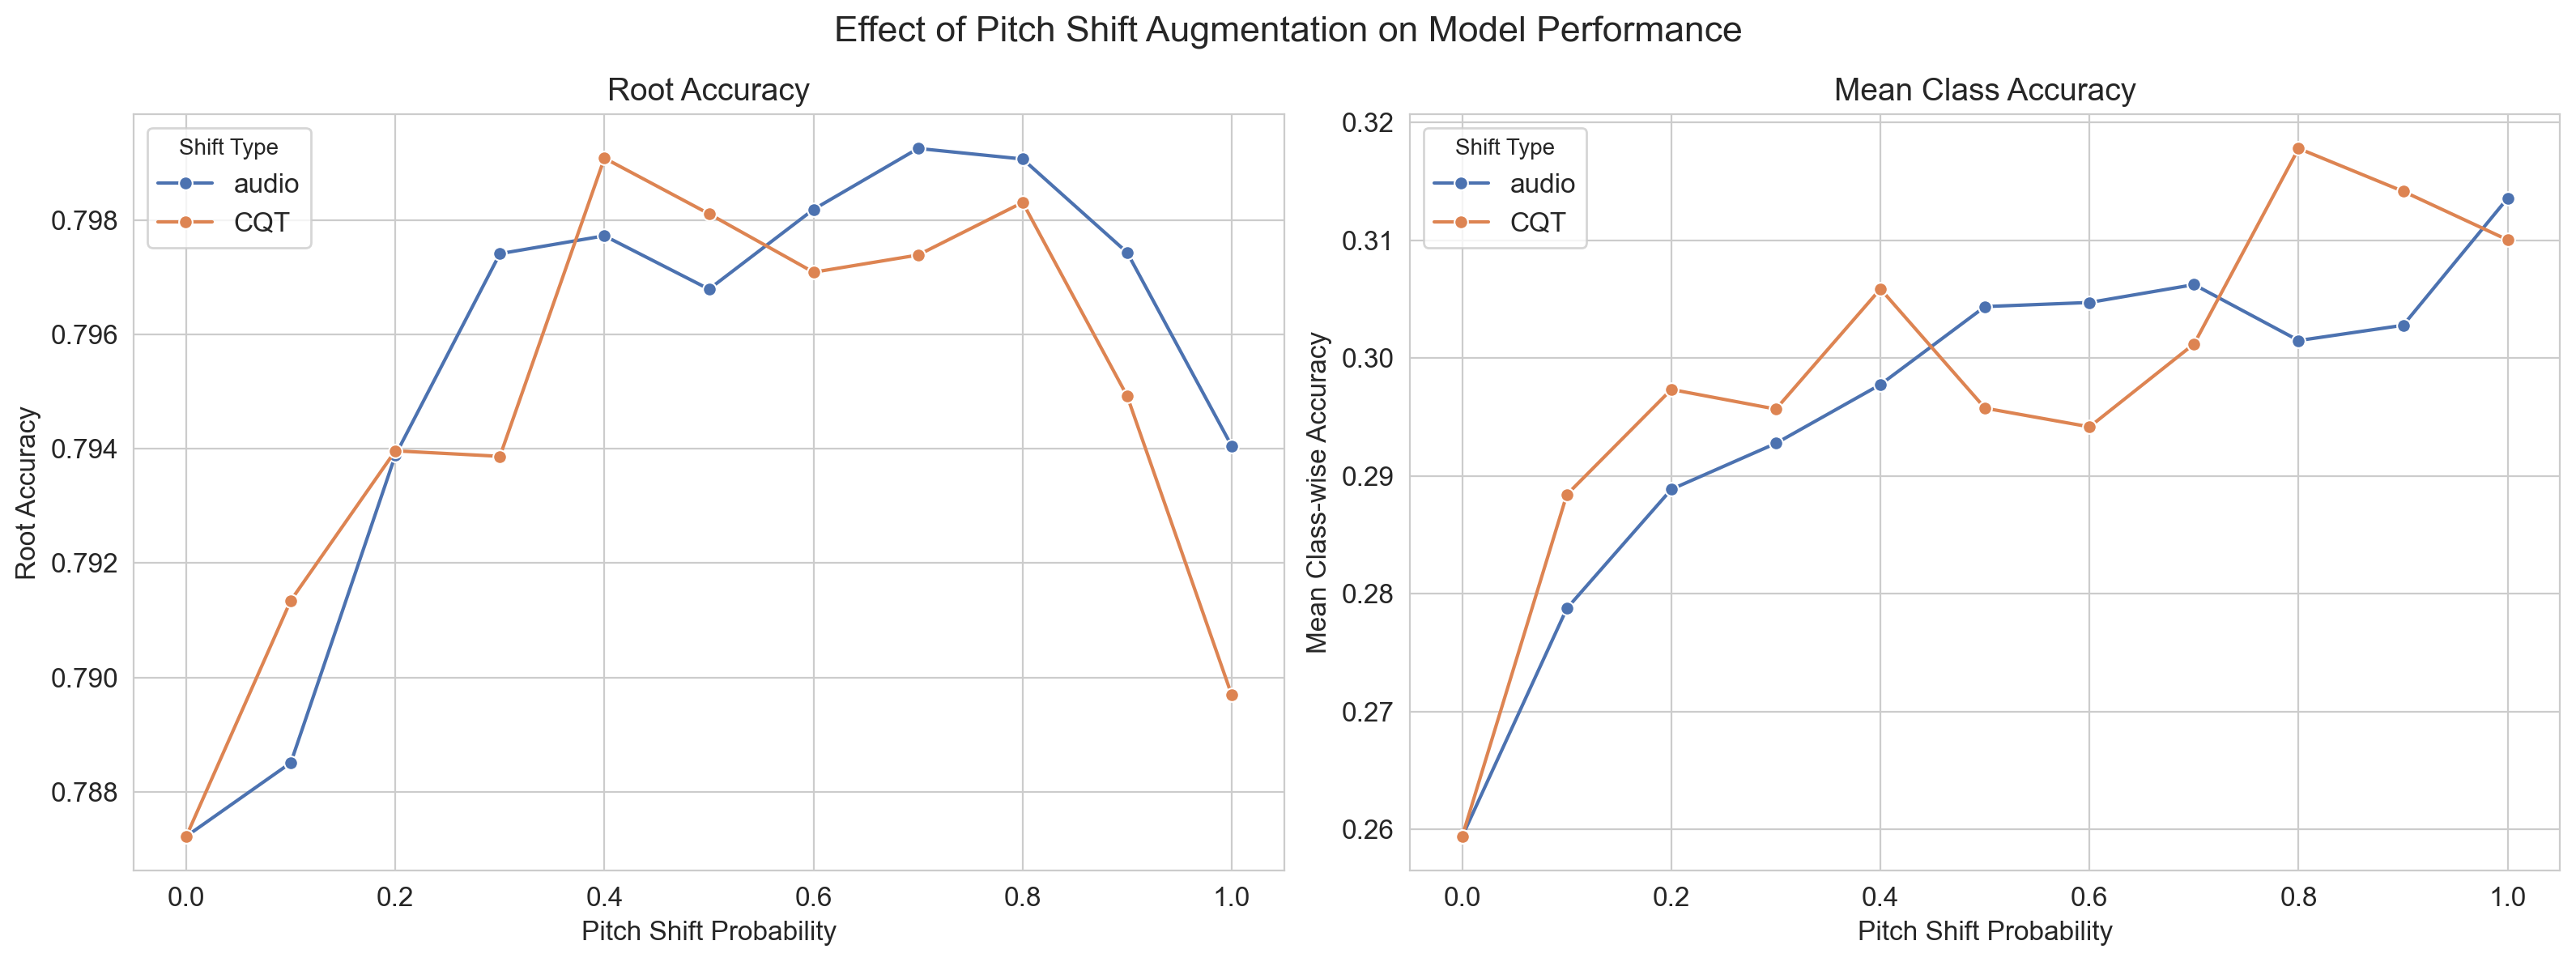

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.set_style("whitegrid")
sns.set_palette("deep")

# Plot the 'root' metric on the left subplot
sns.lineplot(data=df[df['weighted']], x='aug_shift_prob', y='root', hue='shift_type', marker='o', ax=ax1)
ax1.set_title('Root Accuracy vs Pitch Shift Probability')
ax1.set_xlabel('Pitch Shift Probability')
ax1.set_ylabel('Root Accuracy')
ax1.legend(title='Shift Type')

# Plot the 'class_wise_acc_mean' metric on the right subplot
sns.lineplot(data=df[df['weighted']], x='aug_shift_prob', y='class_wise_acc_mean', hue='shift_type', marker='o', ax=ax2)
ax2.set_title('Class-wise Mean Accuracy vs Pitch Shift Probability')
ax2.set_xlabel('Pitch Shift Probability')
ax2.set_ylabel('Class-wise Mean Accuracy')
ax2.legend(title='Shift Type')

# Increase font size for better readability
plt.setp(ax1.xaxis.get_majorticklabels(), fontsize=12)
plt.setp(ax1.yaxis.get_majorticklabels(), fontsize=12)
plt.setp(ax2.xaxis.get_majorticklabels(), fontsize=12)
plt.setp(ax2.yaxis.get_majorticklabels(), fontsize=12)

# axis titles
ax1.set_title('Root Accuracy', fontsize=14)
ax1.set_xlabel('Pitch Shift Probability', fontsize=12)
ax1.set_ylabel('Root Accuracy', fontsize=12)
ax2.set_title('Mean Class Accuracy', fontsize=14)
ax2.set_xlabel('Pitch Shift Probability', fontsize=12)
ax2.set_ylabel('Mean Class-wise Accuracy', fontsize=12)
# Increase legend font size
ax1.legend(title='Shift Type', fontsize=12)
ax2.legend(title='Shift Type', fontsize=12)

# Title larger 
plt.suptitle('Effect of Pitch Shift Augmentation on Model Performance', fontsize=16)
# Adjust layout to prevent overlap
plt.subplots_adjust(top=0.85)
plt.tight_layout()
plt.savefig('thesis/figures/pitch_shift_analysis.png', dpi=200, bbox_inches='tight')
plt.show()


In [119]:
x = torch.Tensor([[0.0, 0.5, 1.0], [0.0, 0.5, 1.0]])
x, x.shape

(tensor([[0.0000, 0.5000, 1.0000],
         [0.0000, 0.5000, 1.0000]]),
 torch.Size([2, 3]))